
Loading DataFrames

Merging DataFrames

Filtering DataFrame

Grouping by 'POS'

Computing Rolling Average Word Lengths

Sizes of groups:  [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 12, 13, 19, 22, 24, 27, 29, 37, 54, 88, 96, 98, 152, 226, 310, 392, 407, 542, 804, 813, 1116, 1206, 1552, 2007, 2440, 3982]

Creating Plot


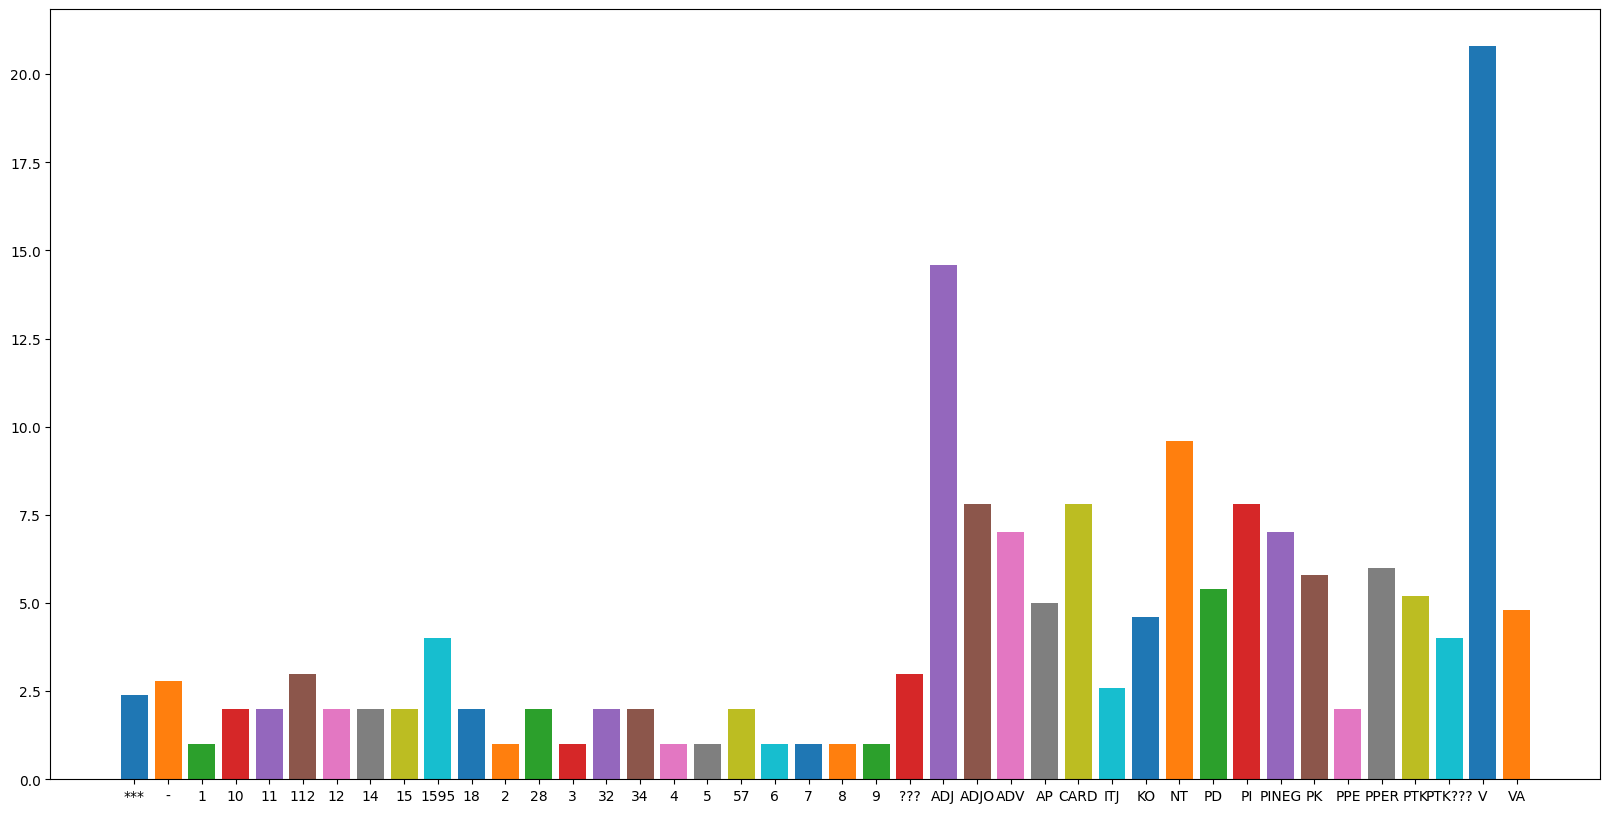


Saving DataFrame to HTML


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Загрузка датафреймов
print("\nLoading DataFrames")
text_df = pd.read_csv('text.csv')
vocab_df = pd.read_csv('vocab.csv')

# Объединение таблиц по 'WORD'
print("\nMerging DataFrames")
merged_df = pd.merge(text_df, vocab_df, on='WORD', how='left')

# Фильтрация строк, где два подряд идущих 'POS' совпадают
print("\nFiltering DataFrame")
two_eq_pos_inarow = merged_df[merged_df['POS']==merged_df.shift(-1)['POS']]

# Группировка по 'POS'
print("\nGrouping by 'POS'")
groups = merged_df.groupby('POS')

# Вычисление скользящего среднего длины слова
print("\nComputing Rolling Average Word Lengths")
rolling_word_lengths = []
group_sizes = []
for group in groups:
    group_df = group[1].copy()
    group_df['WORD_LENGTH'] = group_df['WORD'].apply(len)
    
    rolling_window = min(5, len(group_df))
    sample_volume = min(500, len(group_df))
    
    rolling_word_length = group_df['WORD_LENGTH'].rolling(rolling_window).mean().sample(sample_volume)
    rolling_word_lengths.append(rolling_word_length.values.tolist())
    group_sizes.append(len(group_df))

print("\nSizes of groups: ", sorted(group_sizes))

# Создание нового датафрейма для скользящих средних
roll_df = pd.DataFrame(rolling_word_lengths, index = [group[0] for group in groups])

# Создание графика
print("\nCreating Plot")
figure(figsize=(20, 10))
for i in roll_df.T:
    plt.bar(i, roll_df.loc[i])
plt.savefig('rolling_word_length.jpg')
plt.show()

# Сохранение датафрейма в формате HTML
print("\nSaving DataFrame to HTML")
roll_df.to_html('rolling_word_lengths_grouped_by_pos.html')